# Exploratory Data Analysis

The objective of this EDA is to acquire insights regarding the dataset to understand and interpret possible relationships between features and obesity level in order to use and integrate it when designing and defining classification models.

In section [1. First Exploration](#1-first-exploration), begins to know the different features that make up the dataset and to integrate knowledge to treat them in the best way, that is, the attribute referring to the Body Mass Index (BMI) is defined and the categorical attributes are determined by their type of behavior (nominal or ordinal).

In section [2. Data Analysis](#2-data-analysis), a univariate analysis of some attributes that have a high impact in determining the level of obesity of a person is presented. Where the BMI and overweight relatives play a determining role for someone to have a certain level of obesity, which also allow to prove statistically how they impact on the development of obesity in a person.

In section [3. Factor Analysis](#3-factor-analysis), the factors that allow explaining relationships between features are obtained, being the first factor the one that contains the most relevant information, because it groups the features that have the greatest influence on the level of obesity of a person, most of them being the features analyzed in the previous section.

Finally, in section [4. Cluster Analysis](#4-cluster-analysis), a fundamental fact for the definition of the classifiers is shown, because the levels of obesity are not shown to be linearly separable, so the models will be nonlinear.

# 1. First Exploration

The dataset consists of $2111$ instances, of which the following attributes are reported:

* `Gender`
* `Age`
* `Height`
* `Weight`
* `family_history_with_overweight`: Has a family member suffered or suffers from overweight?
* `FAVC`: Do you eat high caloric food frequently?
* `FCVC`: Do you usually eat vegetables in your meals?
* `NCP`: How many main meals do you have daily?
* `CAEC`: Do you eat any food between meals?
* `SMOKE`: Do you smoke?
* `CH2O`: How much water do you drink daily?
* `SCC`: Do you monitor the calories you eat daily?
* `FAF`: How often do you have physical activity?
* `TUE`: How much time do you use technological devices such as cell phone, videogames, television, computer and others?
* `CALC`: How often do you drink alcohol?
* `MTRANS`: Which transportation do you usually use?
* `NObeyesdad`: Obesity level

The last attribute is the one to be predicted with the different models to be defined and which is distributed as follows according to the values it takes:

* `Insufficient_Weight`: $272$
* `Normal_Weight`: $287$
* `Overweight_Level_I`: $290$
* `Overweight_Level_II`: $290$
* `Obesity_Type_I`: $351$
* `Obesity_Type_II`: $297$
* `Obesity_Type_III`: $324$

It can be observed that there is an imbalance between the classes, so this could cause difficulties when training the model to be able to generate a good separation or classification of the instances. There are no missing values, so we can proceed directly with the analysis.

In [1]:
# Importing auxiliar libraries

import marimo as mo


# Importing libraries

import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.multivariate.factor import Factor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA , KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Importing Functions and Utils

import SourceExploratoryDataAnalysis as src

In [2]:
# Defining useful variables

PATH = '../Datasets/'
PATH_DATASET = PATH + 'ObesityDataset{}.csv'
RANDOM_STATE = 8013

In [3]:
# Loading dataset

ObesityDataset_Raw_0 = pd.read_csv(PATH_DATASET.format(''),engine='pyarrow')
ObesityDataset_Raw_0.columns = ObesityDataset_Raw_0.columns.astype(str)

In [4]:
# Splitting features into Numerical, Categorical and Target features

NumericalFeatures , CategoricalFeatures , ObesityLevel = src.SplitFeatures(ObesityDataset_Raw_0)

In [5]:
_Sample = ObesityDataset_Raw_0.groupby(ObesityLevel).sample(2,random_state=RANDOM_STATE)

## Examples of Instances
_Sample

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
571,Female,17.065445,1.647811,49.603807,no,yes,3.000000,3.566082,Sometimes,no,1.438398,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
523,Female,21.000000,1.520000,42.000000,no,yes,3.000000,1.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
128,Male,20.000000,1.720000,70.000000,yes,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
350,Male,17.000000,1.750000,70.000000,yes,no,2.000000,3.000000,Sometimes,no,1.000000,no,3.000000,2.000000,Sometimes,Walking,Normal_Weight
1453,Male,21.856301,1.871990,115.627554,yes,yes,2.000000,2.358455,Sometimes,no,2.515765,no,0.982320,1.157466,Sometimes,Public_Transportation,Obesity_Type_I
387,Female,37.000000,1.500000,75.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Motorbike,Obesity_Type_I
1566,Male,29.429687,1.910987,129.935666,yes,yes,2.200588,3.000000,Sometimes,no,1.295697,no,1.058378,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
1619,Male,21.721507,1.849998,122.119682,yes,yes,3.000000,2.014671,Sometimes,no,1.292786,no,0.145687,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
2097,Female,25.996716,1.626580,105.037203,yes,yes,3.000000,3.000000,Sometimes,no,2.347322,no,0.008013,0.503896,Sometimes,Public_Transportation,Obesity_Type_III
1873,Female,23.761970,1.691350,114.480696,yes,yes,3.000000,3.000000,Sometimes,no,2.509535,no,0.334264,0.668172,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
## Data types of Features
ObesityDataset_Raw_0.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
# Dataset Contains 0 Missing Values
ObesityDataset_Raw_0.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
# Capitalizing of `yes` and `no` values

ObesityDataset_Raw_1 = ObesityDataset_Raw_0.copy(deep=True)
ObesityDataset_Raw_1[CategoricalFeatures] = ObesityDataset_Raw_1[CategoricalFeatures].map(src.CapitalizeYesNoValues)

In [9]:
## Number of Instances by Obesity Level
ObesityDataset_Raw_1.groupby(ObesityLevel)[CategoricalFeatures[0]].count()

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: Gender, dtype: int64

When observing the values taken by some of the categorical features, it can be determined that they have ordinal behavior (their values are frequencies) or binary (their values are `yes` or `no`); therefore, they can be encoded without losing their sense or meaning. In addition, the feature that represents the target, `NObeyesdad`, can also be associated with an order because its values represent how obesity increases and scales in an individual.

Finally, the feature `BMI` (Body Mass Index) is added, which represents one of the main and most widely used measures to describe health condition and is directly related to the level of obesity of a person.

In [10]:
# Defining auxiliar variables (feature names)

## Numerical features
Age = 'Age'
Height = 'Height'
Weight = 'Weight'
FCVC = 'FCVC'
NCP = 'NCP'
CH2O = 'CH2O'
FAF = 'FAF'
TUE = 'TUE'

## Nominal features
Gender = 'Gender'
MTRANS = 'MTRANS'

## Binary features
FamilyOverweight = 'family_history_with_overweight'
FAVC = 'FAVC'
SMOKE = 'SMOKE'
SCC = 'SCC'

## Frequency features
CAEC = 'CAEC'
CALC = 'CALC'

In [11]:
ObesityDataset_1 = ObesityDataset_Raw_1.copy()


# Feature Encoding 
_BinFeatures = [FamilyOverweight,FAVC,SMOKE,SCC]
ObesityDataset_1[_BinFeatures] = ObesityDataset_1[_BinFeatures].map(src.EncodeBinaryValue)

_FreqFeatures = [CAEC,CALC]
ObesityDataset_1[_FreqFeatures] = ObesityDataset_1[_FreqFeatures].map(src.EncodeFrequencyValue)

ObesityDataset_1[[ObesityLevel]] = ObesityDataset_1[[ObesityLevel]].map(src.EncodeObesityLevel)

# Adding feature 
BMI = 'BMI'
NumericalFeatures.append(BMI)
ObesityDataset_1[BMI] = ObesityDataset_1[Weight] / (ObesityDataset_1[Height]**2)

In [12]:
_Sample = ObesityDataset_1.groupby(ObesityLevel).sample(2,random_state=RANDOM_STATE)

## Examples of Instances After Transformation
_Sample

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
571,Female,17.065445,1.647811,49.603807,0,1,3.000000,3.566082,1,0,1.438398,0,2.000000,1.000000,1,Public_Transportation,0,18.268387
523,Female,21.000000,1.520000,42.000000,0,1,3.000000,1.000000,2,0,1.000000,0,0.000000,0.000000,1,Public_Transportation,0,18.178670
128,Male,20.000000,1.720000,70.000000,1,1,3.000000,3.000000,2,0,1.000000,0,0.000000,0.000000,1,Public_Transportation,1,23.661439
350,Male,17.000000,1.750000,70.000000,1,0,2.000000,3.000000,1,0,1.000000,0,3.000000,2.000000,1,Walking,1,22.857143
750,Male,19.114981,1.855543,88.965521,1,1,2.000000,3.000000,1,0,1.015677,0,0.000000,0.374650,1,Public_Transportation,2,25.839237
932,Male,22.828435,1.710415,75.142858,1,1,2.786008,3.000000,1,0,2.526193,0,0.925118,2.000000,1,Public_Transportation,2,25.685304
1175,Male,33.185661,1.836007,97.416417,1,1,2.000000,1.724887,1,0,3.000000,0,1.000000,0.000000,1,Automobile,3,28.899045
1115,Male,18.000000,1.759721,86.080500,1,1,2.882522,3.000000,1,0,2.452986,0,1.000000,0.746651,1,Public_Transportation,3,27.798230
1425,Male,22.927011,1.751046,95.285898,1,1,2.000000,3.000000,1,0,2.530301,0,2.891180,1.287117,0,Public_Transportation,4,31.076602
1315,Male,36.023972,1.670667,90.575934,1,1,2.903545,1.508685,1,0,2.450069,0,1.454730,0.000000,1,Automobile,4,32.451370


# 2. Data Analysis

This section analyzes the impact of certain factors (attributes) on the level of obesity, where it is shown that BMI is the main attribute that determines the obesity status of a person and that together with other factors, the obesity status of a person could be determined with greater precision.

From the analysis carried out, it can be synthesized that an individual's obesity is mainly determined by the actions and decisions he/she makes, as well as by the influence of his/her environment (such as access to ultra-processed products and overweight family members); therefore, obesity is considered to be a multifactorial disease where the interaction of several circumstances leads to the manifestation of a certain state of health in a person.

Although not all the other factors were analyzed, it could be suggested that their influence is less or equal to the factors considered here, because, as mentioned, BMI is the attribute that has the highest weighting when rating the level of obesity in a person (this is shown at a practical level, as it is widely used by doctors, as well as by the statistical analysis performed).

## 2.1.Body Mass Index (BMI)

As mentioned, the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) is a metric that allows to sufficiently describe the physical condition of a person; this is directly related to the level and state of his or her obesity. Therefore, a range of values that the BMI takes to determine whether a person is at normal weight, overweight or obese has been proposed. By observing the plot generated, it can be determined that these ranges of values exist although they are not completely accurate.

As the complexity and level of obesity increases so do the mean and median BMI, this represents a statistically strong correlation ($\rho = 0.9778$) and association between these two measures. In addition, the range formed by the first and third quartiles for the different levels of obesity do not overlap, so the values will present significant differences.

From the above, it could be concluded that the `IBM` of a person can generate a good first estimate of the obesity suffered by an individual, reason enough to use it as a preferred metric to describe the physical condition. But to improve its accuracy, factors related to physical activity and nutrition (diet) could be considered.

In [13]:
src.SummaryStatisticsFeature(
    ObesityDataset_1,
    BMI,
)

,mean,std,25%,50%,75%
Obesity Level,,,,,
Insufficient_Weight,17.404245,0.786231,17.095501,17.547455,17.906245
Normal_Weight,22.014147,1.842017,20.673154,22.145329,23.688544
Overweight_Level_I,25.990772,0.660822,25.577969,25.977932,26.388558
Overweight_Level_II,28.215232,0.827862,27.612992,28.152417,28.889196
Obesity_Type_I,32.255636,1.130957,31.370619,32.200035,32.973741
Obesity_Type_II,36.723424,1.290127,35.750525,36.417803,37.880693
Obesity_Type_III,42.273746,2.578689,40.591185,41.942617,43.838604


<Axes: title={'center': 'Distribution of Body Mass Index'}, xlabel='Body Mass Index', ylabel='Obesity Level'>

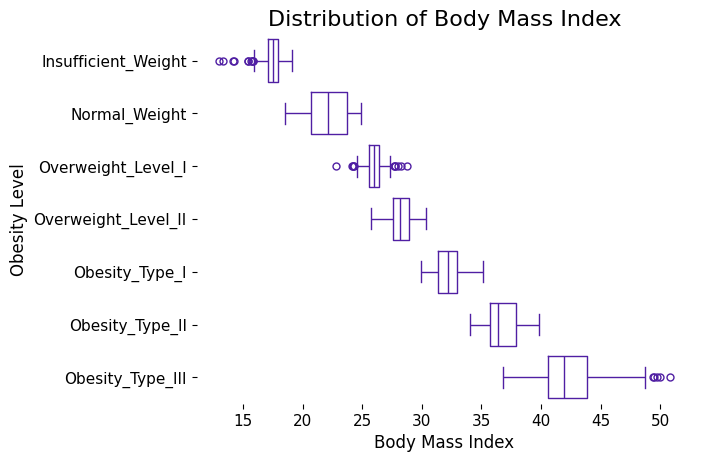

In [14]:
src.PlotFeatureOverCategories(
    ObesityDataset_1,
    BMI,
    ObesityDataset_Raw_1[ObesityLevel],
    FeatureName='Body Mass Index',
    CategoryName='Obesity Level',
)

Applying the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) on consecutive levels of obesity shows that there is a significant difference in the means of `BMI` with a significance level of $\alpha = 0.01$, thus showing that `BMI` is a differentiating metric for determining the overall health status of an individual.

In [15]:
# Applying t-test for difference between means

for _level_1 in range(6):
    _level_2 = _level_1 + 1
    _Sample_1 = ObesityDataset_1.query(f'{ObesityLevel} == {_level_1}')[BMI]
    _Sample_2 = ObesityDataset_1.query(f'{ObesityLevel} == {_level_2}')[BMI]
    _result = stats.ttest_ind(
        _Sample_1,
        _Sample_2,
        equal_var=False,
        alternative='less',
    )
    print(f'{src.MapLevelObesity[_level_1]:<20} < {src.MapLevelObesity[_level_2]:<20} :: {'Yes' if _result.pvalue < 0.01 else 'No'}')

Insufficient_Weight  < Normal_Weight        :: Yes
Normal_Weight        < Overweight_Level_I   :: Yes
Overweight_Level_I   < Overweight_Level_II  :: Yes
Overweight_Level_II  < Obesity_Type_I       :: Yes
Obesity_Type_I       < Obesity_Type_II      :: Yes
Obesity_Type_II      < Obesity_Type_III     :: Yes


## 2.2. Family History With Overweight

A fact that is common when a patient suffers from obesity is that the patient's family circle also suffers from it, this can be shown by observing that there is a positive trend between the complexity of obesity and the number of cases where they have a family member with obesity. This fact becomes evident when considering the plot, where two considerable biases are appreciated, that is, a patient who does not have overweight relatives tends not to have a high level of obesity and if he/she does, he/she tends to have a high level of obesity.

The above observations allow to describe `family_history_with_overweight` as a risk factor that does not have a direct impact or strong influence, but rather allows to observe the health condition of the family circle and what one might observe in it.

In [16]:
PivotFamilyOverweight = src.SummaryCategoricalFeature(
    ObesityDataset_1,
    FamilyOverweight,
)

PivotFamilyOverweight

family_history_with_overweight,No,Yes
Obesity Level,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Overweight_Level_I,81,209
Overweight_Level_II,18,272
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324


<Axes: title={'center': 'Distribution of Relatives\nwith Overweight'}, xlabel='Obesity Level', ylabel='Count'>

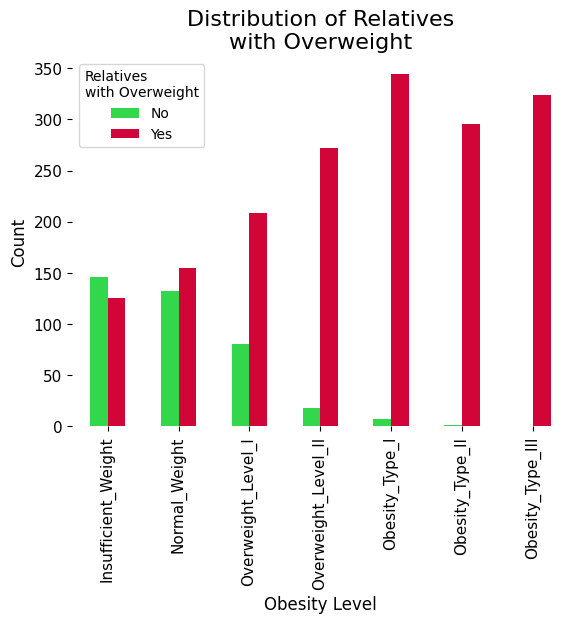

In [17]:
src.PlotPivotTable(
    PivotFamilyOverweight,
    'Relatives\nwith Overweight',
)

## 2.3. Physical Activity

The frequency and the amount of hours of physical activity become factors that allow to combat and reduce obesity in a person, therefore it becomes a habit that is constantly promoted. To show how physical activity influences the level of obesity, a decrease should be observed as obesity increases.

When considering the medians in the different levels, it can be appreciated that there is no uniform or noticeable decrease, only in the extreme levels these decrements can be appreciated. But there is a bias that allows a better evaluation of this phenomenon, most of the levels (except for Obesity Type III) have a negative bias, this could be an indication of a promotion of physical activity among these groups and that part of the population tries to perform this physical activation. This impacts on a reduction of obesity over time and, in general, a concern or interest in having a healthy life.

Although there is a tendency to do physical activity, there is still a high variance in each group, which means that not all individuals or patients follow the suggestion to do physical activity, so there is the possibility of encouraging it and increasing the time invested in health care.

In [18]:
src.SummaryStatisticsFeature(
    ObesityDataset_1,
    FAF,
)

,mean,std,25%,50%,75%
Obesity Level,,,,,
Insufficient_Weight,1.250131,0.856625,0.425546,1.339914,2.000000
Normal_Weight,1.247387,1.016362,0.000000,1.000000,2.000000
Overweight_Level_I,1.056796,0.851600,0.323802,1.000000,1.646474
Overweight_Level_II,0.958072,0.824744,0.121017,0.960716,1.438672
Obesity_Type_I,0.986748,0.894675,0.017059,0.990642,1.692518
Obesity_Type_II,0.971857,0.581238,0.582686,0.994422,1.376217
Obesity_Type_III,0.664817,0.732864,0.000000,0.222654,1.461248


<Axes: title={'center': 'Distribution of Frequency of\nPhysical Activity'}, xlabel='Frequency of\nPhysical Activity', ylabel='Obesity Level'>

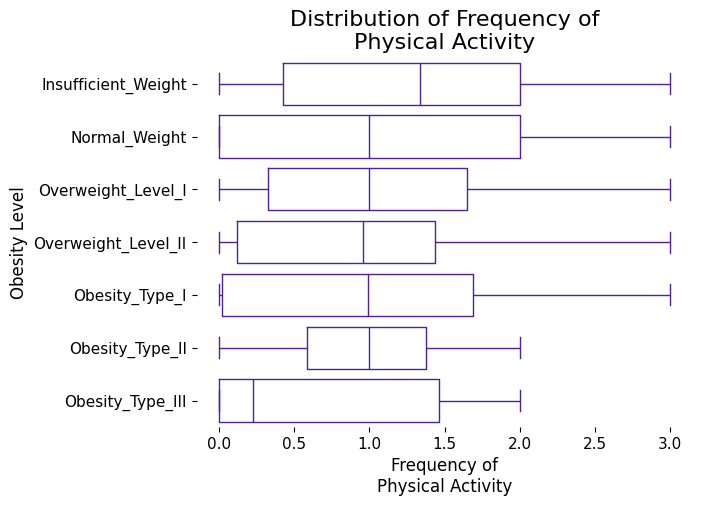

In [19]:
src.PlotFeatureOverCategories(
    ObesityDataset_1,
    FAF,
    ObesityDataset_Raw_1[ObesityLevel],
    FeatureName='Frequency of\nPhysical Activity',
    CategoryName='Obesity Level',
)

Omitting the extreme cases (Insufficient Weight and Obesity Type III) that follow the trend of decreasing physical activity as obesity increases, there remain the levels where apparently no clear trend is shown. Using the [Spearman Rank-Order Correlation Coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) it can be shown that in these levels the correlation is not strong although its p-value is significant; this could indicate that the effect of physical activity is not appreciable, that is, there is a similar number of cases that follow the trend as those that do not follow it and the overall effect becomes negligible.

In [20]:
_Data = ObesityDataset_1[[FAF,ObesityLevel]].query(f'0 < {ObesityLevel} < 6')
_Result = stats.spearmanr(_Data[FAF],_Data[ObesityLevel],alternative='less')

print(f'Spearman Correlation Coefficient :: {_Result.statistic}\nP Value :: {_Result.pvalue}')

Spearman Correlation Coefficient :: -0.06028221779732451
P Value :: 0.009473748142112244


## 2.4. High Caloric Food

The consumption of high calorie foods is associated with obesity because they are non nutritious or ultra-processed foods. Therefore, the more they are consumed, the greater the likelihood of developing obesity or health problems. This can be shown by considering the trend of consumption, where as the complexity of obesity advances, the likelihood or consumption of high-calorie foods increases.

When determining the coefficient of correspondence or association ($D = 0.4458$), it is shown that the association is significant and notable, therefore there is statistical evidence to indicate that the consumption of high-calorie foods increases with the increase in the level of obesity. In other words, people with a higher obesity index tend to consume high-calorie foods frequently.

In [21]:
PivotFAVC = src.SummaryCategoricalFeature(
    ObesityDataset_1,
    FAVC,
)

PivotFAVC

FAVC,No,Yes
Obesity Level,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Overweight_Level_I,22,268
Overweight_Level_II,74,216
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323


<Axes: title={'center': 'Distribution of High Caloric Food'}, xlabel='Obesity Level', ylabel='Count'>

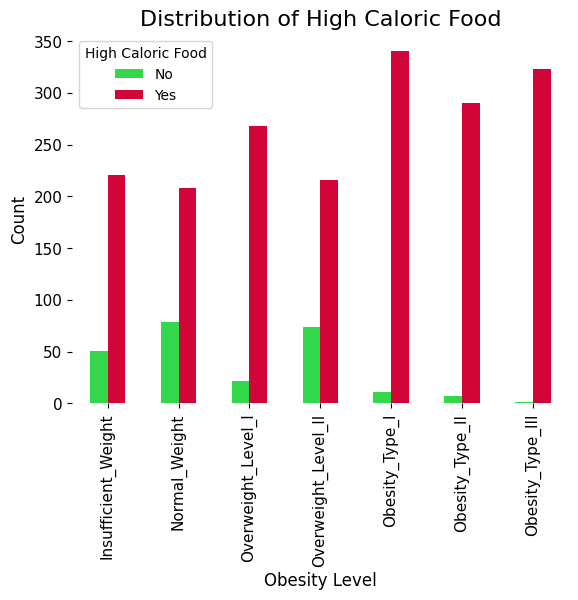

In [22]:
src.PlotPivotTable(
    PivotFAVC,
    'High Caloric Food',
)

In [23]:
_Result = stats.somersd(ObesityDataset_1[FAVC],ObesityDataset_1[ObesityLevel])

print(f'Somers Correspondence Coefficient :: {_Result.statistic}\nP Value :: {_Result.pvalue}')

Somers Correspondence Coefficient :: 0.44585165255812936
P Value :: 1.1326968336699322e-35


# 3. Factor Analysis

When considering the first three factors, it is found that they allow to explain with greater understanding some of the attributes considered in [Data Analysis](#2-data-analysis). The following results show that the indicated attributes have a loading score greater than $0.5$ in absolute value:

* Factor 1 [`Height`, `Weight`, `family_history_with_overweight`, `BMI`] focus on attributes related to the individual's physical condition and which are the main factors determining a person's level of obesity by considering that all relevant attributes have a positive loading on the factor. The latter can be contrasted by considering the [BMI analysis](#21body-mass-index-bmi).

* Factor 2 [`Age`, `MTRANS_Public_Transportation`, `MTRANS_Automobile`] concerns the means of transportation aspect, where the use of public transportation and automobiles are in opposite directions, because the use of one determines, to some extent, the economic position of a person and his or her access to certain means of transportation. This factor is not relevant to the discussion concerning the level of obesity.

* Factor 3 [`Gender`, `Height`] represents the phenomenon that men tend to be taller than women. Although height does play a relevant role in determining the level of obesity, it is not the only thing, so this factor remains more of a confirmation or statistical proof of a known fact in medicine.

Of the factors studied, the first one concentrated most of the relevant information for the study, because its attributes allow explaining why a person is at a certain level of obesity, not only considering his/her weight and height but also his/her environment (close family with overweight).

In [24]:
# Applying auxiliar encodings to features

MTRANS_Encode = list(map(str,'MTRANS_'+src.TransportationMethods))
ObesityDataset_2 = ObesityDataset_1.copy(deep=True)

ObesityDataset_2[Gender] = ObesityDataset_2[Gender].map(src.EncodeGenderValue)
ObesityDataset_2[[*MTRANS_Encode]] = [*ObesityDataset_2[MTRANS].map(src.EncodeMTransValue)]
ObesityDataset_2.drop(columns=[MTRANS,ObesityLevel],inplace=True)

In [25]:
# Calculating loadings and scores of FA

Num_Factors = 3
FactorAnalysis = Factor(ObesityDataset_2.to_numpy(),Num_Factors)
FactorAnalysisResults = FactorAnalysis.fit()

In [26]:
# Relevant features in each factor

for _factor in range(Num_Factors):
    _filter_loadings = np.abs(FactorAnalysis.loadings[:,_factor])>0.5

    print(f'\nFactor {_factor+1} ::')
    for _feature , _load in zip(ObesityDataset_2.columns[_filter_loadings],FactorAnalysis.loadings[_filter_loadings,_factor]):
        print(f'{_feature} {_load:.4f}')


Factor 1 ::
Height 0.5386
Weight 0.9248
family_history_with_overweight 0.5262
BMI 0.8341

Factor 2 ::
Age -0.5304
MTRANS_Public_Transportation 0.9321
MTRANS_Automobile -0.8678

Factor 3 ::
Gender -0.5732
Height -0.8000


<Axes: title={'center': 'Loading Factor\nRelevant Features'}, xlabel='Factor 1', ylabel='Factor 2'>

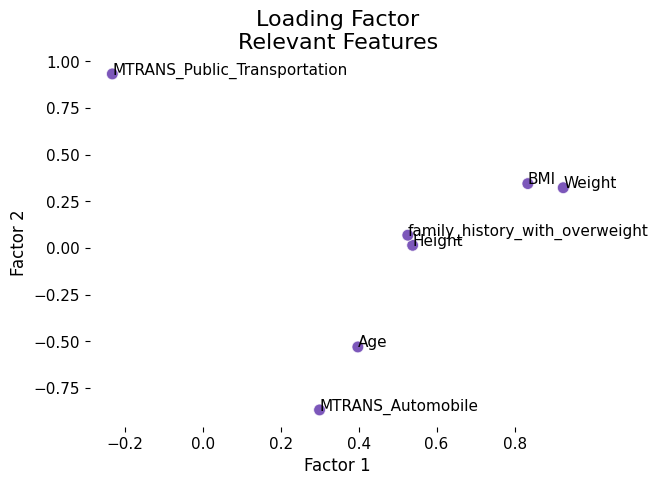

In [27]:
src.PlotFactorAnalysisLoadings(FactorAnalysis.loadings,ObesityDataset_2.columns)

# 4. Cluster Analysis

In order to perform the cluster analysis, it was necessary to consider in the first instance that all the features must have the same range of values for an adequate clustering, for this reason `MinMaxScaler` was used, and, on the other hand, we have a high dimensionality dataset, therefore a `PCA` was performed to conserve the first $4$ principal components.

K-Means was chosen as the clustering algorithm using $3$ clusters, it is done with this number of groups to capture the levels of obesity according to whether it is underweight or normal weight, overweight and obese.

Since there is an overlap between clusters, due to a Silhouette coefficient of $0.3753$, clustering together with PCA did not allow an adequate separation between the expected groups. The latter could be related to the fact that the original `NObeyesdad` classes are not linearly separable and this can be compared by observing the plots generated by the principal components.

In [28]:
# Defining clustering with preprocessing pipeline

PreprocessingFeatures = ColumnTransformer(
    [
        ('Normalization',MinMaxScaler(),NumericalFeatures)
    ],
    remainder='passthrough',
)

components = 4
ClusteringAnalysis = Pipeline(
    [
        ('Preprocessing',PreprocessingFeatures),
        ('DimensionalReduction',PCA(n_components=components,random_state=RANDOM_STATE)),
        ('Clustering',KMeans(n_clusters=3,random_state=RANDOM_STATE)),
    ]
)

In [32]:
# Applying cluster analysis

LabelsClusters = ClusteringAnalysis.fit_predict(ObesityDataset_2)
TransformedDataset = ClusteringAnalysis[:2].transform(ObesityDataset_2)

_score = silhouette_score(TransformedDataset,LabelsClusters)
print(f'Silhouette Score :: {_score:.4f}')

Silhouette Score :: 0.3753


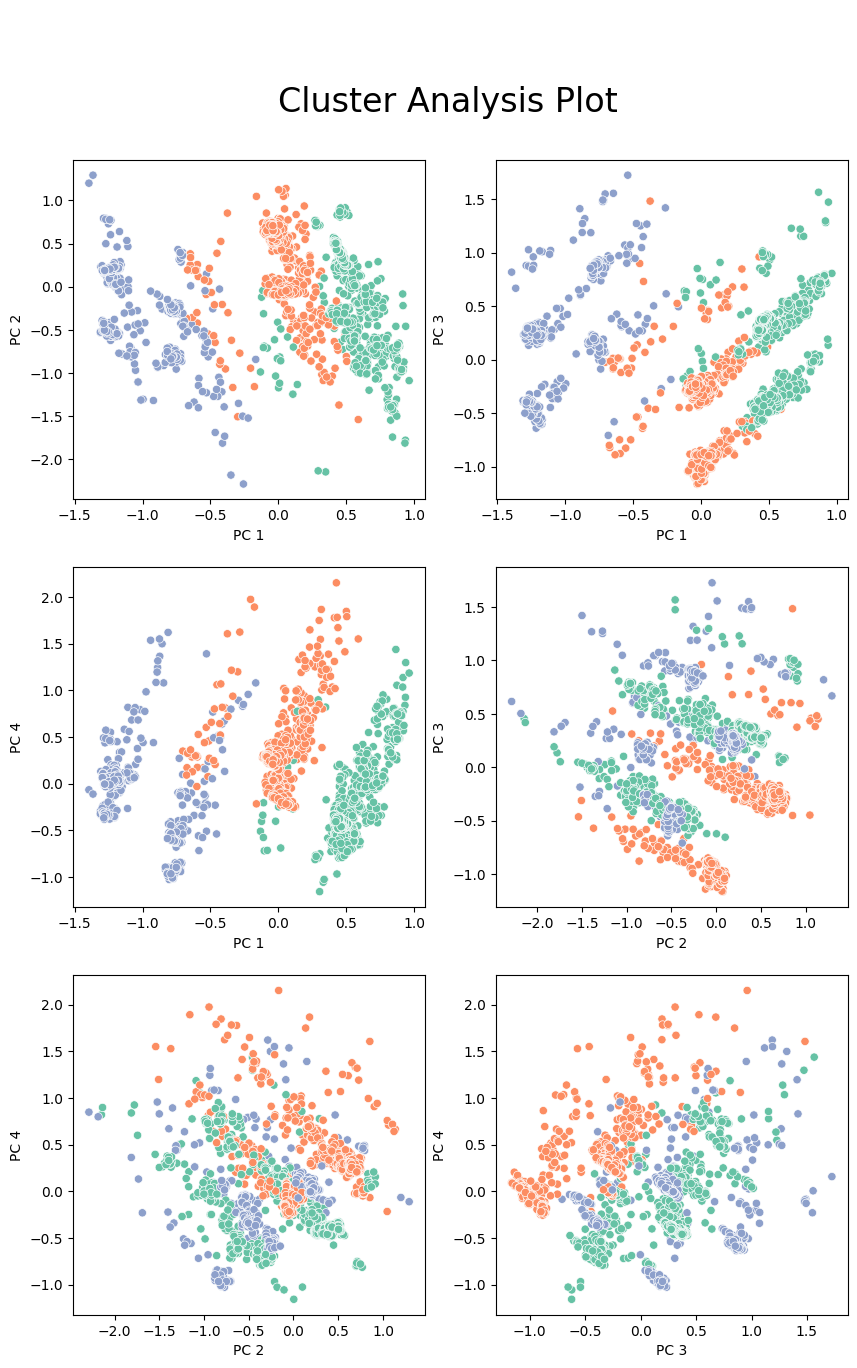

In [30]:
src.PlotClusterAnalysis(TransformedDataset,LabelsClusters)[1];

In [31]:
# Definiting and saving the final dataset

ObesityDataset_Clean = ObesityDataset_2.copy(deep=True)
ObesityDataset_Clean[ObesityLevel] = ObesityDataset_1[ObesityLevel]

# ObesityDataset_Clean.to_csv(PATH_DATASET.format('_Clean'))